In [1]:
import pandas as pd
import numpy as np

import warnings
warnings.filterwarnings('ignore')
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler,OrdinalEncoder

In [2]:
from sklearn.model_selection import train_test_split,cross_val_score,KFold
from sklearn.metrics import r2_score

In [3]:
from sklearn.pipeline import Pipeline

In [4]:
from sklearn.compose import ColumnTransformer

In [5]:
from sklearn.linear_model import LinearRegression

In [6]:
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor

In [7]:
df = pd.read_csv("/content/calories.csv")
dt = pd.read_csv("/content/exercise.csv")

dt.head()

,User_ID,Gender,Age,Height,Weight,Duration,Heart_Rate,Body_Temp
0,14733363,male,68,190.0,94.0,29.0,105.0,40.8
1,14861698,female,20,166.0,60.0,14.0,94.0,40.3
2,11179863,male,69,179.0,79.0,5.0,88.0,38.7
3,16180408,female,34,179.0,71.0,13.0,100.0,40.5
4,17771927,female,27,154.0,58.0,10.0,81.0,39.8


In [8]:
df.head()

,User_ID,Calories
0,14733363,231.0
1,14861698,66.0
2,11179863,26.0
3,16180408,71.0
4,17771927,35.0


In [9]:
data = pd.merge(df,dt,on="User_ID")
data.head()

,User_ID,Calories,Gender,Age,Height,Weight,Duration,Heart_Rate,Body_Temp
0,14733363,231.0,male,68,190.0,94.0,29.0,105.0,40.8
1,14861698,66.0,female,20,166.0,60.0,14.0,94.0,40.3
2,11179863,26.0,male,69,179.0,79.0,5.0,88.0,38.7
3,16180408,71.0,female,34,179.0,71.0,13.0,100.0,40.5
4,17771927,35.0,female,27,154.0,58.0,10.0,81.0,39.8


In [10]:
print("Data Information")
data.info()

Data Information
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15000 entries, 0 to 14999
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   User_ID     15000 non-null  int64  
 1   Calories    15000 non-null  float64
 2   Gender      15000 non-null  object 
 3   Age         15000 non-null  int64  
 4   Height      15000 non-null  float64
 5   Weight      15000 non-null  float64
 6   Duration    15000 non-null  float64
 7   Heart_Rate  15000 non-null  float64
 8   Body_Temp   15000 non-null  float64
dtypes: float64(6), int64(2), object(1)
memory usage: 1.0+ MB


In [11]:
print("Statistics")
data.describe()

Statistics


,User_ID,Calories,Age,Height,Weight,Duration,Heart_Rate,Body_Temp
count,1.500000e+04,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000
mean,1.497736e+07,89.539533,42.789800,174.465133,74.966867,15.530600,95.518533,40.025453
std,2.872851e+06,62.456978,16.980264,14.258114,15.035657,8.319203,9.583328,0.779230
min,1.000116e+07,1.000000,20.000000,123.000000,36.000000,1.000000,67.000000,37.100000
25%,1.247419e+07,35.000000,28.000000,164.000000,63.000000,8.000000,88.000000,39.600000
50%,1.499728e+07,79.000000,39.000000,175.000000,74.000000,16.000000,96.000000,40.200000
75%,1.744928e+07,138.000000,56.000000,185.000000,87.000000,23.000000,103.000000,40.600000
max,1.999965e+07,314.000000,79.000000,222.000000,132.000000,30.000000,128.000000,41.500000


In [12]:
print("To Check Null Values")
data.isnull().sum()

To Check Null Values


User_ID       0
Calories      0
Gender        0
Age           0
Height        0
Weight        0
Duration      0
Heart_Rate    0
Body_Temp     0
dtype: int64

In [13]:
print("To check Duplicated Values")
data.duplicated().any()

To check Duplicated Values


False

<Figure size 500x300 with 0 Axes>

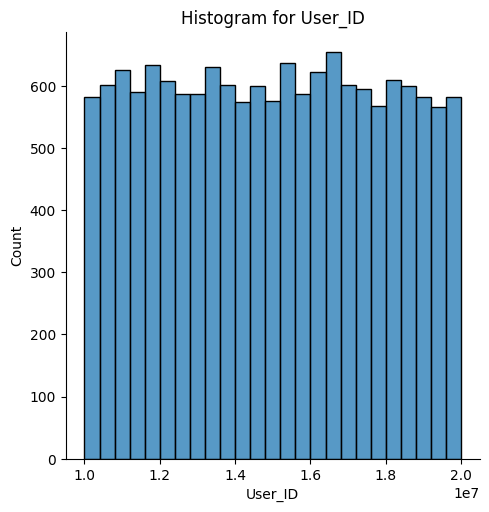

<Figure size 500x300 with 0 Axes>

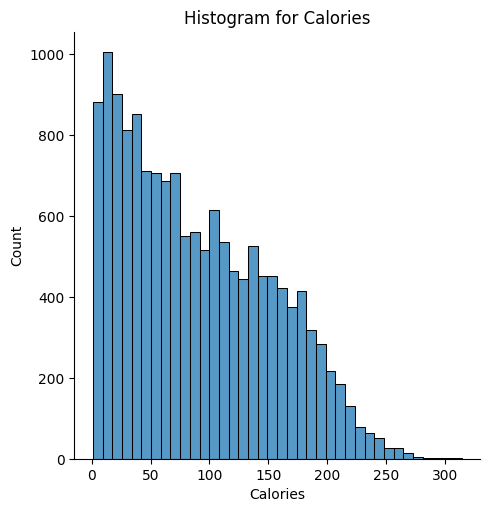

<Figure size 500x300 with 0 Axes>

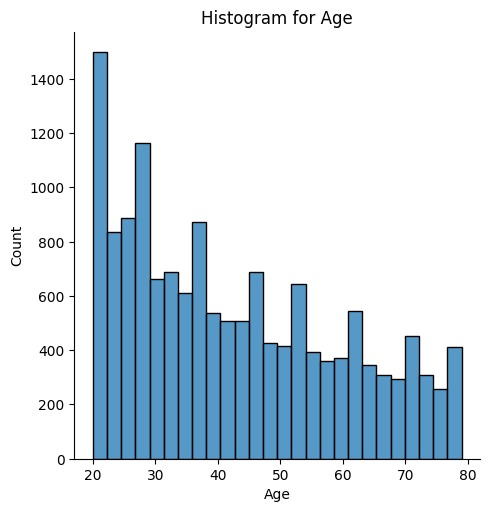

<Figure size 500x300 with 0 Axes>

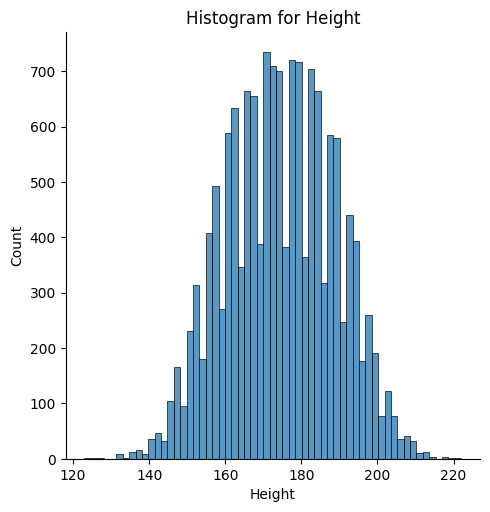

<Figure size 500x300 with 0 Axes>

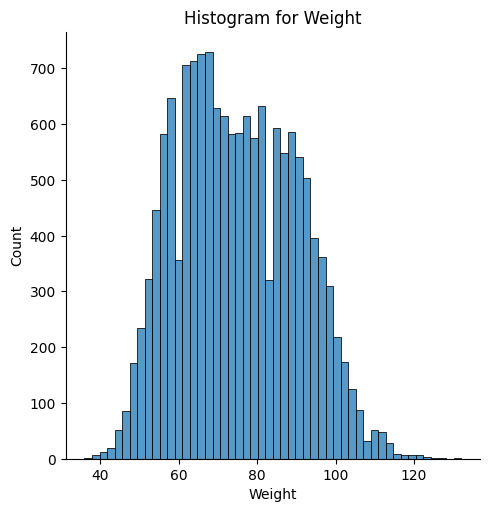

<Figure size 500x300 with 0 Axes>

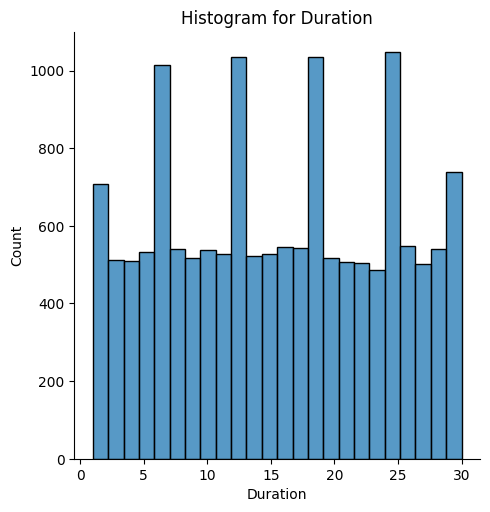

<Figure size 500x300 with 0 Axes>

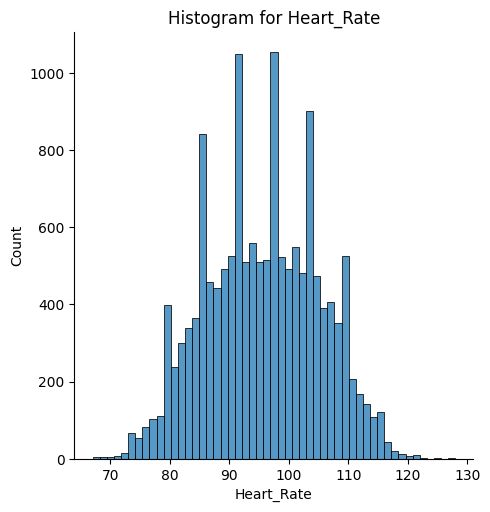

<Figure size 500x300 with 0 Axes>

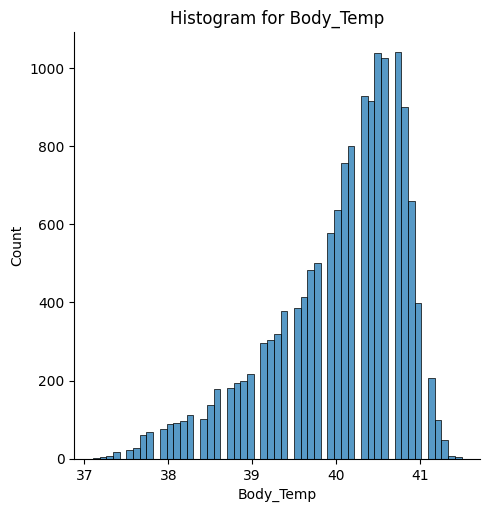

In [14]:
def plot_graph(data):
    num_columns = data.select_dtypes(include = np.number).columns
    for column in num_columns:
      plt.figure(figsize=(5,3))
      sns.displot(data[column])
      plt.title(f"Histogram for {column}")
plot_graph(data)

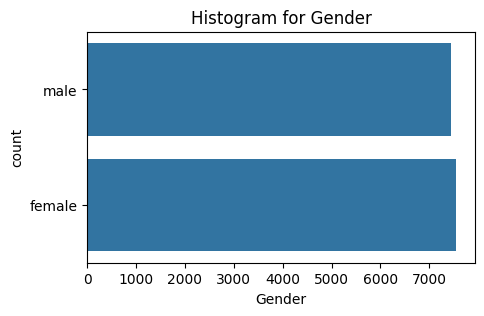

In [15]:
def plot_graph(data):
    cat_columns = data.select_dtypes(include = object).columns
    for column in cat_columns:
      plt.figure(figsize=(5,3))
      sns.countplot(data[column])
      plt.title(f"Histogram for {column}")
      plt.xlabel(column)
      plt.ylabel("count")
      plt.show()
plot_graph(data)

In [16]:
data.columns


Index(['User_ID', 'Calories', 'Gender', 'Age', 'Height', 'Weight', 'Duration',
       'Heart_Rate', 'Body_Temp'],
      dtype='object')

In [17]:
def sep_features_target(data,target_column):
     x = data.drop(columns=[target_column],axis=1)
     y = data[target_column]
     return x , y
x , y = sep_features_target(data,'Calories')
y.head()


0    231.0
1     66.0
2     26.0
3     71.0
4     35.0
Name: Calories, dtype: float64

In [18]:
x.head()

,User_ID,Gender,Age,Height,Weight,Duration,Heart_Rate,Body_Temp
0,14733363,male,68,190.0,94.0,29.0,105.0,40.8
1,14861698,female,20,166.0,60.0,14.0,94.0,40.3
2,11179863,male,69,179.0,79.0,5.0,88.0,38.7
3,16180408,female,34,179.0,71.0,13.0,100.0,40.5
4,17771927,female,27,154.0,58.0,10.0,81.0,39.8


In [19]:

X_train,X_test,Y_train,Y_test = train_test_split(x,y,test_size=0.2,random_state=42)
print(X_train)

X_train.shape




        User_ID  Gender  Age  Height  Weight  Duration  Heart_Rate  Body_Temp
9839   16554569    male   37   179.0    77.0       7.0        81.0       39.5
9680   18903739    male   23   195.0    87.0      26.0       110.0       40.5
7093   11938260    male   33   181.0    77.0      12.0        88.0       40.1
11293  14116395  female   66   156.0    54.0       9.0        77.0       39.5
820    13815395  female   32   144.0    49.0       5.0        90.0       39.0
...         ...     ...  ...     ...     ...       ...         ...        ...
5191   11890347  female   75   148.0    51.0      22.0       104.0       40.6
13418  13504073  female   21   172.0    67.0      20.0       104.0       40.7
5390   17918506    male   57   189.0    92.0       8.0        90.0       39.5
860    12133833    male   35   174.0    76.0      12.0        97.0       40.2
7270   19189565    male   26   182.0    86.0      16.0        91.0       40.5

[12000 rows x 8 columns]


(12000, 8)

In [20]:
x.shape

(15000, 8)

In [21]:
X_train.shape

(12000, 8)

In [22]:
preprocessor = ColumnTransformer(transformers=[('cat',OrdinalEncoder(),['Gender']),
                                ('num',StandardScaler(),['Age','Height','Weight','Duration','Heart_Rate','Body_Temp'])],remainder = 'passthrough')


In [23]:
Z = Pipeline([('preprocessor',preprocessor),("model",LinearRegression())])

In [24]:
from sklearn import set_config
set_config(display='diagram')
Z

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('cat', OrdinalEncoder(),
                                                  ['Gender']),
                                                 ('num', StandardScaler(),
                                                  ['Age', 'Height', 'Weight',
                                                   'Duration', 'Heart_Rate',
                                                   'Body_Temp'])])),
                ('model', LinearRegression())])

In [25]:
Z.fit(X_train,Y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('cat', OrdinalEncoder(),
                                                  ['Gender']),
                                                 ('num', StandardScaler(),
                                                  ['Age', 'Height', 'Weight',
                                                   'Duration', 'Heart_Rate',
                                                   'Body_Temp'])])),
                ('model', LinearRegression())])

In [26]:
y_pred = Z.predict(X_test)

In [27]:
r2_score(Y_test,y_pred)

0.967275915248802

In [28]:
m = KFold(n_splits=5,shuffle = True ,random_state=42)
n = cross_val_score(Z,x,y,cv = m,scoring='r2')

In [29]:
n

array([0.96727592, 0.96542254, 0.96747401, 0.96820263, 0.96731313])

In [30]:
n.mean()

0.9671376478081648

In [31]:
def model_scorer(model_name,model):
    output = []
    output.append(model_name)
    Z = Pipeline([('preprocessor',preprocessor),("model",model)])
    X_train,X_test,Y_train,Y_test = train_test_split(x,y,test_size=0.2,random_state=42)
    Z.fit(X_train,Y_train)
    y_pred = Z.predict(X_test)

    output.append(r2_score(Y_test,y_pred))
    m = KFold(n_splits=5,shuffle = True ,random_state=42)
    n = cross_val_score(Z,x,y,cv = m,scoring='r2')
    output.append(n.mean())


    return output







In [32]:
model_dict = {
    'log':LinearRegression(),
    'RF':RandomForestRegressor(),
    'XGBR': XGBRegressor(),
}

In [33]:
model_output = []
for model_name,model in model_dict.items():
    model_output.append(model_scorer(model_name,model))



In [34]:
model_output

[['log', 0.967275915248802, 0.9671376478081648],
 ['RF', 0.9981102920101711, 0.9977258137502432],
 ['XGBR', 0.9987887970755981, 0.9987483122665456]]

In [35]:
Z = Pipeline([('preprocessor',preprocessor),("model",XGBRegressor())])
Z.fit(x,y)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('cat', OrdinalEncoder(),
                                                  ['Gender']),
                                                 ('num', StandardScaler(),
                                                  ['Age', 'Height', 'Weight',
                                                   'Duration', 'Heart_Rate',
                                                   'Body_Temp'])])),
                ('model',
                 XGBRegressor(base_score=None, booster=None, callbacks=None,
                              colsample_bylevel=None, colsample_bynode=None,
                              colsample_bytree=None, dev...
                              feature_types=None, gamma=None, grow_policy=None,
                              importance_type=None,
                              interaction_constraints=None, learning_rate=None,
                              max_bin=None, max_cat_threshold=None,
                              max_cat_to_onehot=None, max_delta_step=None,
                              max_depth=None, max_leaves=None,
                              min_child_weight=None, missing=nan,
                              monotone_constraints=None, multi_strategy=None,
                              n_estimators=None, n_jobs=None,
                              num_parallel_tree=None, random_state=None, ...))])

In [36]:
sample = pd.DataFrame({
     'User_ID':'14733363',
    'Gender':'male',
    'Age':'68',
    'Height':'190.0',
    'Weight':'94',
    'Duration':'29.0',
    'Heart_Rate':'105.0',
    'Body_Temp':'40.8'

},index=[0])



In [37]:
Z.predict(sample)

array([231.03056], dtype=float32)

In [38]:
import pickle
with open('Z.pkl','wb') as f:
    pickle.dump(Z,f)
with open('Z.pkl','rb') as f:
    x=pickle.load(f)
x.predict(sample)

array([231.03056], dtype=float32)